# Tasca: Test d'hipòtesis

In [34]:
# Càrrega de llibreries
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

## Exercici 1
__Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.__

In [2]:
# Importació de la base de dades
data_MLB = pd.read_csv('MLB.txt', encoding='utf-8', sep='\t')
data_MLB.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0


In [3]:
# Dimensions del dataset
data_MLB.shape

(828, 4)

In [4]:
# Informació del dataset
data_MLB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   player    828 non-null    object 
 1   team      828 non-null    object 
 2   position  828 non-null    object 
 3   salary    828 non-null    float64
dtypes: float64(1), object(3)
memory usage: 26.0+ KB


In [5]:
# Descriptiu de les dades numèriques
data_MLB.describe()

,salary
count,828.000000
mean,3281.828339
std,4465.448980
min,400.000000
25%,418.315000
50%,1093.750000
75%,4250.000000
max,33000.000000


In [6]:
# Descriptiu de les dades categòriques
data_MLB.describe(include='object')

,player,team,position
count,828,828,828
unique,828,30,9
top,Carlos Villanueva,Oakland Athletics,Pitcher
freq,1,31,410


<span style='color:blue; font-size:18px'> <b> Test de Normalitat per a la variable 'salary' </b> </span>

- H0: La variable 'salary' segueix una distribució Normal
- H1: La variable 'salary' NO segueix una distribució Normal 

<AxesSubplot:>

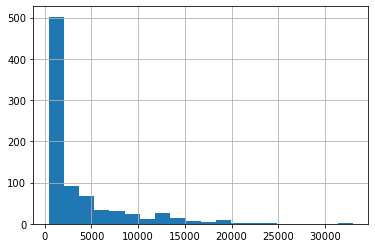

In [10]:
# Histograma de  la variable 'salary'
data_MLB['salary'].hist(bins = 20)

In [12]:
# Test de Normalidat de Shapiro-Wilk
alpha = 0.05
stat, p = shapiro(data_MLB['salary'])
print('estadístic=%.3f, p-valor=%.3f' % (stat, p))
if p > alpha:
    print('Es probable que es distribueixi normalment')
else:
    print('Es probable que NO es distribueixi normalment')

estadístic=0.693, p-valor=0.000
Es probable que NO es distribueixi normalment


<span style='color:blue'> El resultat del test és un p-valor molt pròxim a 0, més petit que alpha. Per tant, es rebutja la hipòtesi nul·la de normalitat amb molta evidència. L'histograma respatlla el test, ja que es veu asimetria per l'esquerra (no te forma de campana) </span>

## Exercici 2
__Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.__

<span style='color:blue; font-size:18px'> <b> Test ANOVA per a la variable 'salary' agrupada per 'position' </b> </span>

- H0: Les mitjanes de salari per posició són iguals
- H1: Almenys una de les mitjanes és diferent

<AxesSubplot:title={'center':'salary'}, xlabel='position'>

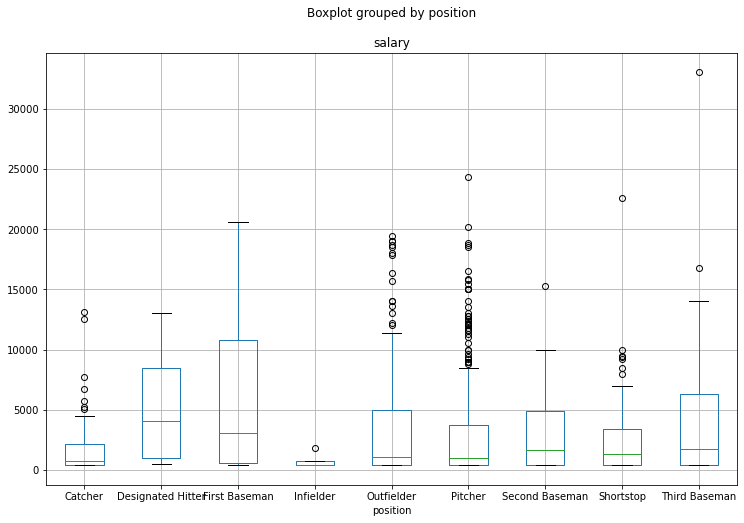

In [26]:
# Boxplot del salaris per posició
data_MLB.boxplot('salary', by='position', figsize=(12, 8))

In [21]:
# Creació del model
mod = ols('salary ~ position', data = data_MLB).fit()

In [22]:
# Test ANOVA
anova_1 = sm.stats.anova_lm(mod, typ=2)
print(anova_1)

                sum_sq     df         F    PR(>F)
position  6.097532e+08    8.0  3.930746  0.000142
Residual  1.588082e+10  819.0       NaN       NaN


<span style='color:blue'> El resultat del test és un p-valor molt pròxim a 0, més petit que alpha = 0.05. Per tant, es rebutja la hipòtesi nul·la d'igualtat de mitjanes de salaris per posició. El boxplot respatlla el test, ja que es veuen diferències en les mitjanes de Infielder i Dessignated Hitter, per exemple. </span>

## Exercici 3
__Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.__

<span style='color:blue; font-size:18px'> <b> Test ANOVA per a la variable 'salary' de la 'position = Pitcher' agrupada per 'team' </b> </span>

- H0: Les mitjanes de salari per posició són iguals
- H1: Almenys una de les mitjanes és diferent

In [28]:
# Es filtra la base de dades: només interesa els jugador amb posició de Pitcher
dades_pitcher = data_MLB[data_MLB['position'] == 'Pitcher']

In [29]:
# Dimensions del dataset
dades_pitcher.shape

(410, 4)

In [31]:
# Descriptiu de les dades numèriques
dades_pitcher.describe()

,salary
count,410.000000
mean,2999.197149
std,4102.627814
min,400.000000
25%,415.625000
50%,1000.000000
75%,3768.750000
max,24285.714000


<AxesSubplot:title={'center':'salary'}, xlabel='team'>

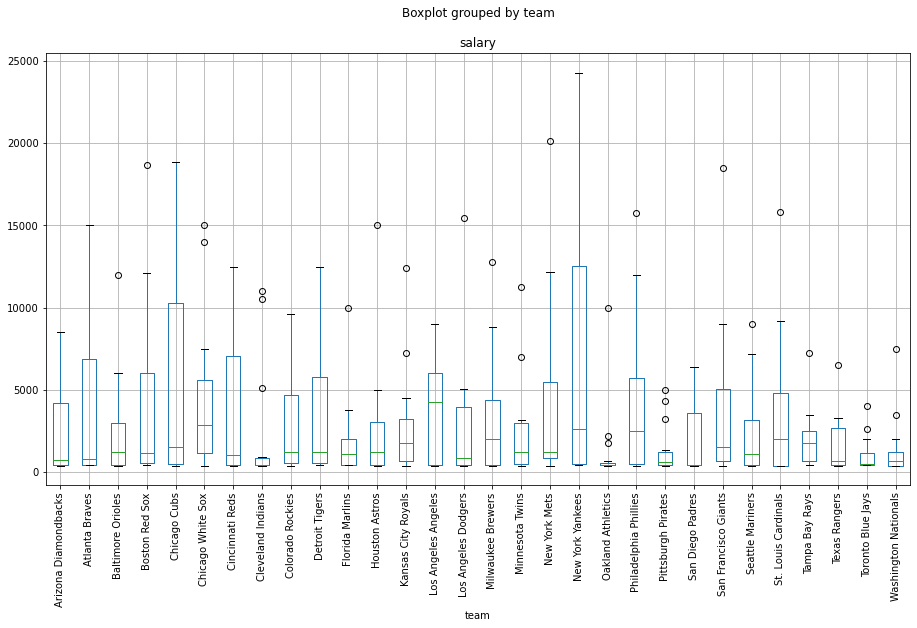

In [38]:
# Boxplot del salaris de Pitcher per equip
dades_pitcher.boxplot('salary', by='team', figsize=(15, 8), rot=90)

In [39]:
# Creació del model
mod_2 = ols('salary ~ team', data = dades_pitcher).fit()

In [41]:
# Test ANOVA
anova_2 = sm.stats.anova_lm(mod_2, typ=2)
print(anova_2)

                sum_sq     df         F    PR(>F)
team      7.338338e+08   29.0  1.563468  0.034136
Residual  6.150272e+09  380.0       NaN       NaN


<span style='color:blue'> El resultat del test és un p-valor de 0.03, més petit que alpha = 0.05. Per tant, es rebutja la hipòtesi nul·la d'igualtat de mitjanes de salaris de pitcher per equip. El boxplot respatlla el test, ja que es veuen diferències en les mitjanes de Cleveland Indians i Los Angeles Angeles, per exemple. </span>